In [32]:
#Dataset:



Why FB Prophet:
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [4]:
  !pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.5 MB/s eta 0:00:00


In [5]:
import prophet

In [6]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [8]:
df= pd.read_csv("/content/HDFC bank (1).csv")

In [9]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-10,48.965000,48.970001,47.029999,47.639999,46.123142,3310800
1,2018-12-11,48.355000,48.500000,47.529999,47.779999,46.258678,1810400
2,2018-12-12,48.950001,49.744999,48.849998,49.334999,47.764168,2669200
3,2018-12-13,49.544998,50.509998,49.500000,50.380001,48.775894,2372200
4,2018-12-14,49.794998,50.439999,49.544998,50.220001,48.620991,1569800


In [10]:
df.shape

(1258, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [12]:
df["Date"]= pd.to_datetime(df["Date"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [14]:
df["Date"].min()


Timestamp('2018-12-10 00:00:00')

In [15]:
df["Date"].max()

Timestamp('2023-12-07 00:00:00')

In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
dataset = df[["Date",'Close']]

In [18]:
dataset.head()

,Date,Close
0,2018-12-10,47.639999
1,2018-12-11,47.779999
2,2018-12-12,49.334999
3,2018-12-13,50.380001
4,2018-12-14,50.220001


In [19]:
dataset["Date"].nunique()

1258

In [20]:
len(dataset)

1258

In [21]:
df_prophet=dataset.rename(columns = {"Date":"ds","Close":"y"})

In [22]:
df_prophet

,ds,y
0,2018-12-10,47.639999
1,2018-12-11,47.779999
2,2018-12-12,49.334999
3,2018-12-13,50.380001
4,2018-12-14,50.220001
...,...,...
1253,2023-12-01,60.709999
1254,2023-12-04,63.259998
1255,2023-12-05,62.880001
1256,2023-12-06,62.730000


In [23]:
from prophet import Prophet

In [24]:
m =Prophet()
model=m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprxcgzvp_/f5rmfhgn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprxcgzvp_/1s_7sity.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2844', 'data', 'file=/tmp/tmprxcgzvp_/f5rmfhgn.json', 'init=/tmp/tmprxcgzvp_/1s_7sity.json', 'output', 'file=/tmp/tmprxcgzvp_/prophet_model3bxw2wjp/prophet_model-20231208111438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:14:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:14:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [26]:
# Building Time Series Forecasting model by using FB Prophet  model
# we are predicting 6 months data

In [27]:
future_data = model.make_future_dataframe(periods = 180, freq = "D")

In [28]:
future_data

,ds
0,2018-12-10
1,2018-12-11
2,2018-12-12
3,2018-12-13
4,2018-12-14
...,...
1433,2024-05-31
1434,2024-06-01
1435,2024-06-02
1436,2024-06-03


In [29]:
df_prophet.shape

(1258, 2)

In [30]:
future_data.shape

(1438, 1)

In [31]:
prediction = model.predict(future_data)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-10,46.288374,43.041407,51.219059,46.288374,46.288374,0.940327,0.940327,0.940327,-0.276844,-0.276844,-0.276844,1.217171,1.217171,1.217171,0.0,0.0,0.0,47.228701
1,2018-12-11,46.370293,43.539097,51.674583,46.370293,46.370293,1.033069,1.033069,1.033069,-0.153489,-0.153489,-0.153489,1.186558,1.186558,1.186558,0.0,0.0,0.0,47.403362
2,2018-12-12,46.452211,43.289871,51.628761,46.452211,46.452211,1.004900,1.004900,1.004900,-0.156283,-0.156283,-0.156283,1.161183,1.161183,1.161183,0.0,0.0,0.0,47.457112
3,2018-12-13,46.534130,43.350540,51.765674,46.534130,46.534130,0.933454,0.933454,0.933454,-0.209587,-0.209587,-0.209587,1.143041,1.143041,1.143041,0.0,0.0,0.0,47.467584
4,2018-12-14,46.616049,43.125258,51.720478,46.616049,46.616049,0.993536,0.993536,0.993536,-0.140435,-0.140435,-0.140435,1.133971,1.133971,1.133971,0.0,0.0,0.0,47.609585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,2024-05-31,60.498539,51.840987,69.815348,52.435929,68.588488,-0.012396,-0.012396,-0.012396,-0.140435,-0.140435,-0.140435,0.128040,0.128040,0.128040,0.0,0.0,0.0,60.486143
1434,2024-06-01,60.485607,52.389160,70.040066,52.340853,68.645942,0.719083,0.719083,0.719083,0.468319,0.468319,0.468319,0.250764,0.250764,0.250764,0.0,0.0,0.0,61.204690
1435,2024-06-02,60.472675,52.510886,70.947057,52.251463,68.737421,0.828539,0.828539,0.828539,0.468318,0.468318,0.468318,0.360220,0.360220,0.360220,0.0,0.0,0.0,61.301214
1436,2024-06-03,60.459743,51.409606,70.076640,52.175240,68.774631,0.178834,0.178834,0.178834,-0.276844,-0.276844,-0.276844,0.455678,0.455678,0.455678,0.0,0.0,0.0,60.638577


In [35]:
prediction[["ds","yhat_lower","yhat_upper","yhat"]].tail(180)

,ds,yhat_lower,yhat_upper,yhat
1258,2023-12-08,59.838448,67.652695,63.915484
1259,2023-12-09,60.352337,68.601373,64.476606
1260,2023-12-10,60.048194,68.444046,64.429459
1261,2023-12-11,59.344546,67.905497,63.639766
1262,2023-12-12,59.437571,68.235426,63.723313
...,...,...,...,...
1433,2024-05-31,51.840987,69.815348,60.486143
1434,2024-06-01,52.389160,70.040066,61.204690
1435,2024-06-02,52.510886,70.947057,61.301214
1436,2024-06-03,51.409606,70.076640,60.638577


In [34]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

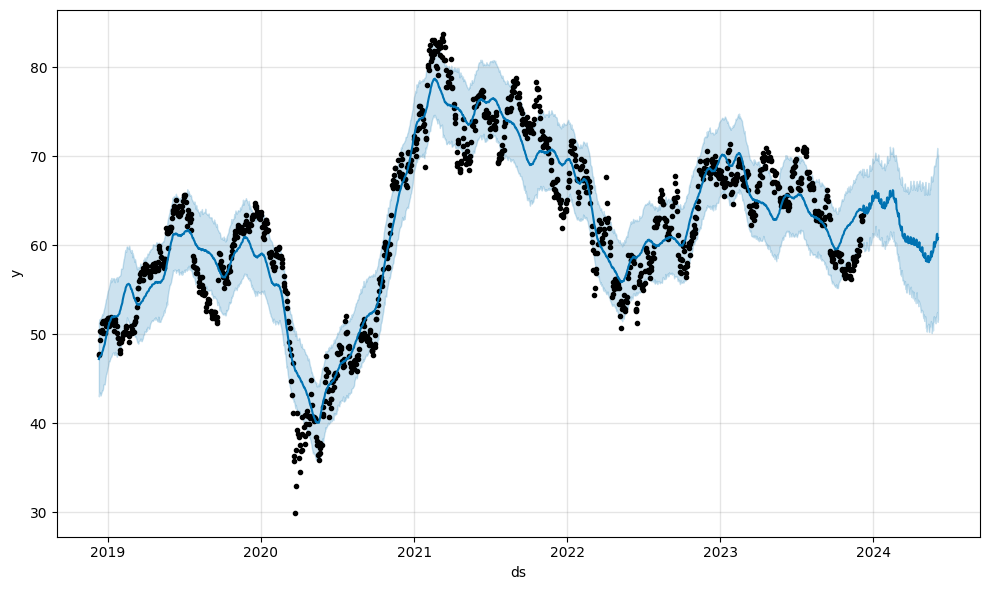

In [36]:
model.plot(prediction)
plt.show()

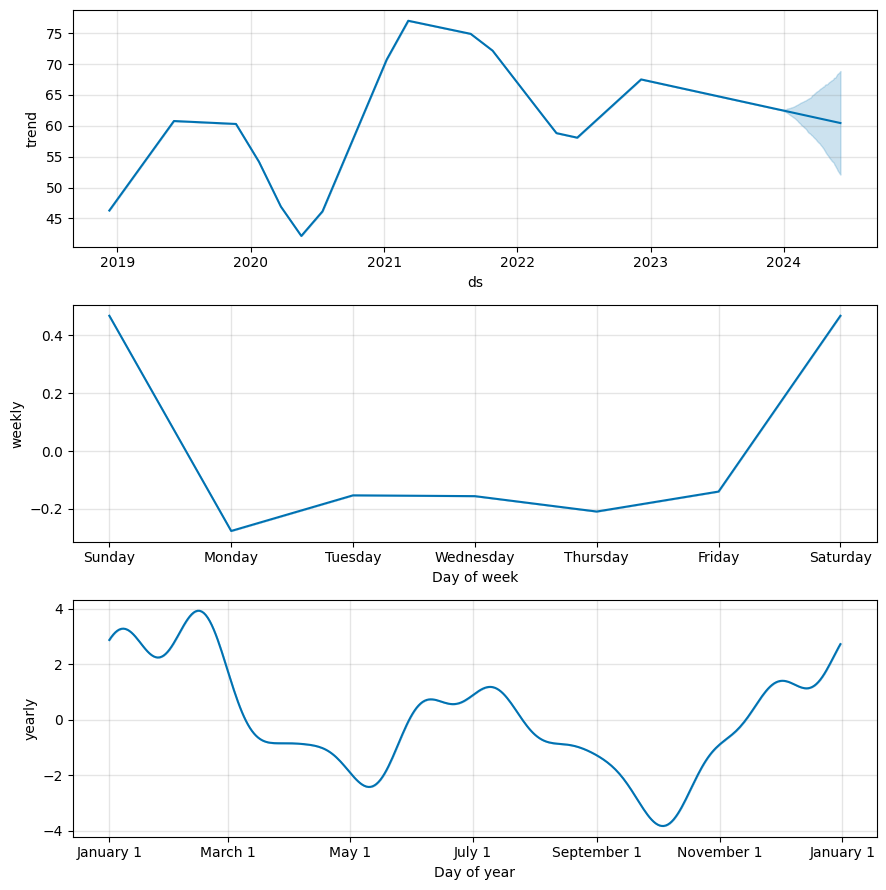

In [37]:
model.plot_components(prediction)
plt.show()

In [ ]:
# cross validation

In [38]:
from prophet.diagnostics import cross_validation

In [39]:
df_cv =cross_validation(model,horizon= "30 days", period = "15 days", initial = "90 days")

INFO:prophet:Making 114 forecasts with cutoffs between 2019-03-18 00:00:00 and 2023-11-07 00:00:00


  0%|          | 0/114 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprxcgzvp_/0hjjji1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprxcgzvp_/l4s_6saq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10848', 'data', 'file=/tmp/tmprxcgzvp_/0hjjji1z.json', 'init=/tmp/tmprxcgzvp_/l4s_6saq.json', 'output', 'file=/tmp/tmprxcgzvp_/prophet_model2nan1ygu/prophet_model-20231208114130.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:41:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprxcgzvp_/mves200f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprxcgzvp_/9_j8pldx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [41]:
from prophet.diagnostics import performance_metrics

In [42]:
df_performance= performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,17.625153,4.198232,3.190471,0.052018,0.038172,0.051903,0.518675
1,4 days,19.657022,4.433624,3.379541,0.055305,0.039972,0.055297,0.500000
2,5 days,22.444748,4.737589,3.631048,0.059987,0.043070,0.059658,0.464218
3,6 days,26.387593,5.136886,3.965878,0.066041,0.050287,0.064994,0.415309
4,7 days,33.483809,5.786520,4.353749,0.073143,0.059316,0.071125,0.372881
5,8 days,44.935415,6.703388,4.798578,0.081202,0.062585,0.078058,0.367123
6,9 days,53.447033,7.310748,5.125218,0.086501,0.063440,0.083643,0.376907
7,10 days,56.898059,7.543080,5.228130,0.087715,0.061741,0.086985,0.398305
8,11 days,81.739781,9.041006,5.622037,0.095284,0.062233,0.095520,0.404205
9,12 days,126.167066,11.232411,6.198838,0.106687,0.064389,0.102207,0.404873


In [43]:
from prophet.plot import plot_cross_validation_metric

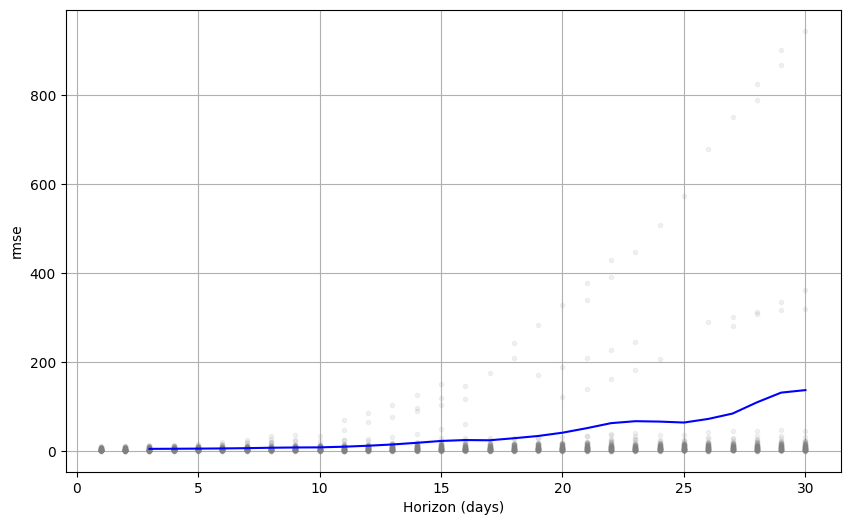

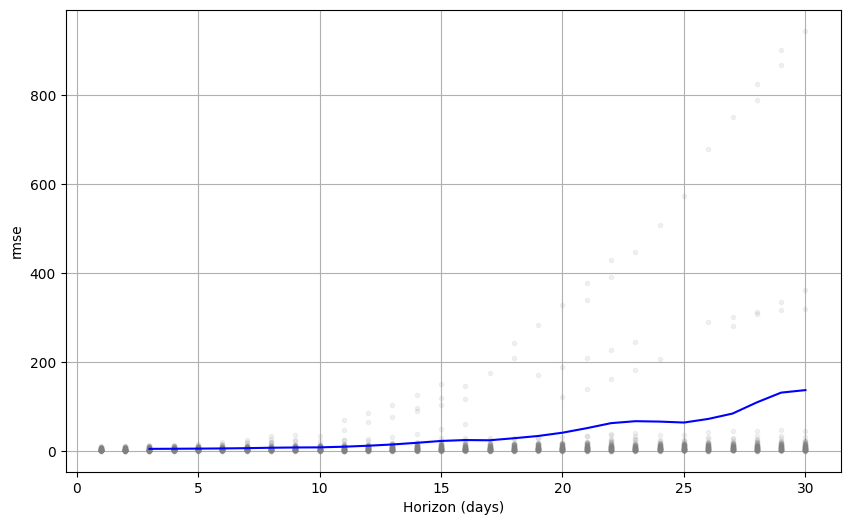

In [44]:
plot_cross_validation_metric(df_cv, metric= "rmse")